In [3]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [4]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [5]:
worksheet = gc.open('EX1').sheet1

In [6]:
data = worksheet.get_all_values()

In [7]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'input':'float'})
dataset1 = dataset1.astype({'output':'float'})
dataset1.head()

,input,output
0,1.0,28.0
1,2.0,35.0
2,3.0,42.0
3,4.0,49.0
4,5.0,56.0


In [8]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
X = dataset1[['input']].values
y = dataset1[['output']].values


In [10]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.]])

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [12]:
scaler = MinMaxScaler()



In [13]:
scaler.fit(X_train)


MinMaxScaler()

In [14]:
X_train1 = scaler.transform(X_train)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [16]:
model = Sequential([
    Dense(units=4,activation='relu',input_shape=[1]),
    Dense(units=2,activation='relu'),
    Dense(units=1)
])

In [17]:
model.compile(optimizer='rmsprop',loss='mse')

In [18]:
model.fit(X_train1,y_train,epochs=15500)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 13002/15500
1/1 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 13003/15500
1/1 [==============================] - 0s 11ms/step - loss: 0.0017
Epoch 13004/15500
1/1 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 13005/15500
1/1 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 13006/15500
1/1 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 13007/15500
1/1 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 13008/15500
1/1 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 13009/15500
1/1 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 13010/15500
1/1 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 13011/15500
1/1 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 13012/15500
1/1 [==========

<Axes: >

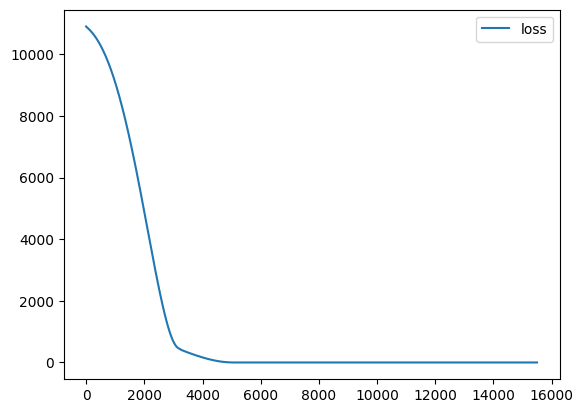

In [19]:
loss= pd.DataFrame(model.history.history)
loss.plot()

In [20]:
X_test1 =scaler.transform(X_test)
model.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 168ms/step - loss: 0.0018


0.0018349324818700552

In [21]:
X_n1=[[2]]
X_n1_1=scaler.transform(X_n1)
model.predict(X_n1_1)

1/1 [==============================] - 0s 93ms/step


array([[35.020588]], dtype=float32)